# AIML Project
# Wrong Side Driving Detection using Computer Vision
By,

Sriram C (1RV18CS173)  
Srinandan KS (1RV18CS172)

Note on training- By default, setup.sh contains the link to the weights file. However you may train it yourself and replace the links to the weights file by using the following Colab notebook: https://colab.research.google.com/drive/1rWyBtL8Qv-TJP6RBt-qheQDwvF1SeFyn

Run the following cell if you want to leave the notebook idle, since unused notebooks are automatically terminated.

In [ ]:
# Infinite Loop
while True:
  pass

Even though setup.sh installs most modules, we need a separate cell for the firebase and anvil related ones due to the runtime reset that they require.

In [ ]:
!pip install anvil-uplink
!pip install pyrebase
!pip install youtube_dl
!pip install json2table
!pip install git+https://github.com/ozgur/python-firebase   #run in case firebase module not found
import firebase  #debug to check whether firebase can be imported
import pyrebase

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 51 kB 243 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=ac088c851bb90cf764f7acf7b24adbd18b879689d7e860526a5b56c75b52a801
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 514 kB 13.6 MB/s 
     |████████████████████████████████| 77 kB 7.3 MB/s 
     |████████████████████████████████| 6.5 MB 59.8 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 458 kB 66.2 MB/s 
  Created wheel for gcloud: filename=gcloud-0.17.0-py3-none-any.whl size=638015 sha256=f875e68e976fb13b968643c2a1d2f55e6a5af637a2b5ad3d1e7eb0f35f22488f
  Stored in directory: /root/.cache/pip/wheels/76/10/90/62a8de50d755940978e1473ed4ce4b579664fcc16077d0dc99
  Created wheel for oauth2client: filename=oauth2client-3.0.0-py3-none-any.whl size=106375 sha256=17ecf7e587e4e4d02d11be58ee5882ff09f44e9691e2cb82b6a308f71192a54d
  Stored in directory: /root/.cache/pip/wheels/86/73/7a/3b3f76a2142176605ff38fbca574327962c71e25a43197a4c1
  Created wheel for pycryptodome: filename=pycryptodome-3.4.3-cp37-cp37m-linux_x86_64.

FileNotFoundError: ignored

In [ ]:
!git clone https://github.com/sriramcu/yolov4_wrong_side_driving_detection

Cloning into 'yolov4_wrong_side_driving_detection'...
remote: Enumerating objects: 1339, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 1339 (delta 24), reused 144 (delta 17), pack-reused 1186
Receiving objects: 100% (1339/1339), 13.69 MiB | 18.26 MiB/s, done.
Resolving deltas: 100% (317/317), done.


In [ ]:
%cd yolov4_wrong_side_driving_detection/

/content/yolov4_wrong_side_driving_detection


Prepare a JSON file named `sensitive_data.json` containing your Firebase account details, as shown in the image below.

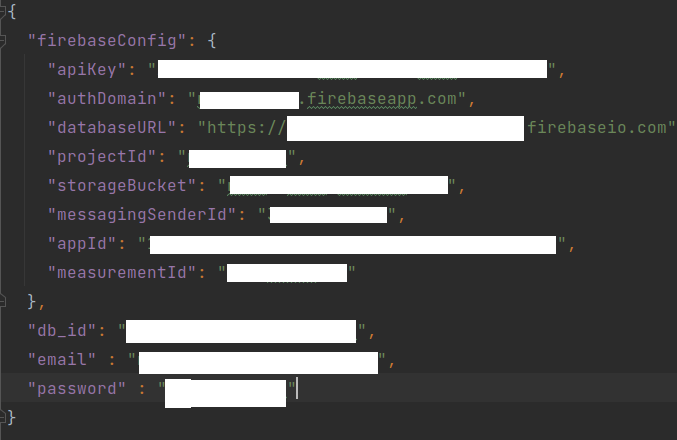


Fill the json values as per your account's firebase configuration settings as explained [here](https://firebase.google.com/docs/firestore/quickstart). Upload the json to your drive and copy its drive link in the next cell.

In [ ]:
# sensitive_data.json for firebase
!gdown <firebase_json_drive_link>

### Setup


In [ ]:
%ls
!cat setup.sh

CITATION.cff     LICENSE           utils/
colab_setup.sh*  nogpusetup.sh     violationframes/
darknet/         output/           weights/
demo_data/       README.md         wrong_side_driving_detection.py
frames/          requirements.txt
__init__.py      setup.sh*
#!/bin/bash -i

pip install gdown
pip install -r requirements.txt
pip install git+https://github.com/ozgur/python-firebase

gdown '19EIcT9ei0QBGWSppdr0JgyK5vQv3GvtQ'
gdown '1VXEucnpOw_uM-tczoQUO9VoLipvBeiCZ'
gdown '1PTciOpFiJcHng-WwnUiENttvTbYjtdR1'
gdown '1UK7U5wHRZwyD4b4zaV5_bbXJI6OtvBts'


mv *.weights weights/
mv *.conv.* weights/


cd darknet/
sed -i 's/OPENCV=0/OPENCV=1/' Makefile
sed -i 's/GPU=0/GPU=1/' Makefile
sed -i 's/CUDNN=0/CUDNN=1/' Makefile
sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
make
cd ..


nvidia-smi
/usr/local/cuda/bin/nvcc --version






Runs the setup file that alters makefile variables related to GPU use, downloads weights file from my drive, moving files to various other directories and installs required python modules.

In [ ]:
# Run ./nogpusetup.sh on local PC if your PC doesn't have a GPU, ./setup.sh if it does.
!./setup.sh

bash: cannot set terminal process group (72): Inappropriate ioctl for device
bash: no job control in this shell
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)
     |████████████████████████████████| 51 kB 349 kB/s 
     |████████████████████████████████| 98 kB 6.2 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 446 kB 65.1 MB/s 
     |████████████████████████████████| 251 kB 70.0 MB/s 
     |████████████████████████████████| 4.0 MB 62.4 MB/s 
  Created wheel for sseclient: filename=sseclient-0.0.27-py3-none-any.whl size=5584 sha256=26b5669d7eab641021835fef39a7755057c7f20fe4aeb7d9fa372f5be8fadf23
  Stored in directory: /root/.cache/pip/wheels/07/67/7e/96edf627ac746de1a5c5cbb8d59ed960f033b8352dc12c545d
  Created wheel for pycryp

### Detection

Run below cell to directly run the program without a frontend. By default violations are not stored on firebase. The command line options can be seen below:  
```python3 wrong_side_driving_detection.py -h
usage: wrong_side_driving_detection.py [-h] [--input INPUT]
                                       [--youtube_link YOUTUBE_LINK]
                                       [--input_mode INPUT_MODE]
                                       [--profile PROFILE]
                                       [--save_output_video SAVE_OUTPUT_VIDEO]
                                       [--show_frames SHOW_FRAMES]
                                       [--use_firebase USE_FIREBASE]

Run the Wrong Side detection code

optional arguments:
  -h, --help            show this help message and exit
  --input INPUT         input video file path, default:
                        demo_data/thai_cctv.mp4
  --youtube_link YOUTUBE_LINK
                        input video youtube link, default:
                        https://www.youtube.com/watch?v=ATq6ZbRQtDY
  --input_mode INPUT_MODE
                        Mode of input, yt for youtube, fl for file, default:
                        yt
  --profile PROFILE     Perform Python profiling to analyse bottlenecks,
                        default: 0
  --save_output_video SAVE_OUTPUT_VIDEO
                        Save output video file, default: 1
  --show_frames SHOW_FRAMES
                        Show output frames as detection is taking place,
                        default: 0
  --use_firebase USE_FIREBASE
                        Use your firebase db to store violation images, make
                        sure to create sensitive_data.json in the same
                        directory as this program, default: 0
```

In [ ]:
# Driver program
!python3 wrong_side_driving_detection.py

[youtube] ATq6ZbRQtDY: Downloading webpage
[youtube] ATq6ZbRQtDY: Downloading MPD manifest
[dashsegments] Total fragments: 12
[download] Destination: aiml_cctv.mp4
[download] 100% of 6.85MiB in 00:02
[youtube] ATq6ZbRQtDY: Downloading webpage
[youtube] ATq6ZbRQtDY: Downloading MPD manifest
Input video downloaded from YouTube
/content/yolov4_wrong_side_driving_detection
aiml_cctv.mp4
Video size = 854.0 X 458.0, FPS = 30.0
Tracking vehicles...
 Try to load cfg: cfg/yolov4-obj.cfg, weights: ../weights/yolov4-obj_last.weights, clear = 0 
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 2

Defined a function to download any colab file

In [ ]:
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
download('output/output.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Connect to Anvil Frontend

In [ ]:
import anvil.server
anvil.server.connect("NC63XCJ7SDMUTQJVZFPMNLRZ-JEA5CYBRQHIKNNOR")

In [ ]:
# Server side/ Backend anvil function to download a youtube video and run our code on it
import anvil.media
import subprocess
import cv2
import os
from __future__ import unicode_literals
import youtube_dl
from google.colab.patches import cv2_imshow
import shelve
@anvil.server.callable
def process_youtube_cctv(inp):

  res = []
  ydl_opts = {'ignoreerrors': True, 'outtmpl': '%(title)s.%(ext)s','format':'135'}
  with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download([inp])
    info_dict = ydl.extract_info(inp, download=False)
    video_title = info_dict.get('title', None)
  videoname = ""
  videoname = video_title+'.mp4'
  cmd = "python3 wrong_side_driving_detection.py --rundetection 1 --input {}".format(videoname)
  cmd = cmd.split(" ")
  process = subprocess.Popen(cmd,stdout=subprocess.PIPE, stderr=subprocess.PIPE)
  out, err = process.communicate()

  a = str(out)+ "\n" + str(err)
  sf = shelve.open("urls.sf")

  if 'urls' in list(sf.keys()):
    urls = sf['urls']

  else:
    urls = []
    print("URLs not stored in shelve file due to Firebase authentication errors, exception thrown in driver code.")

  sf.close()

  res.append(a)
  res.append(urls)
  res.append(inp)
  return res

Download annotated output video and violation images stored in the colab environment by the program.

In [ ]:
download('output/output.mp4')

In [ ]:
!zip -r violations.zip violationframes
download("violations.zip")

  adding: violationframes/ (stored 0%)
  adding: violationframes/1100.jpg (deflated 0%)
  adding: violationframes/1200.jpg (deflated 0%)
  adding: violationframes/placeholder.txt (stored 0%)
  adding: violationframes/1300.jpg (deflated 0%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

An example of a violation image stored in firebase is stored below (red colored centroid indicates a WSD violation):  
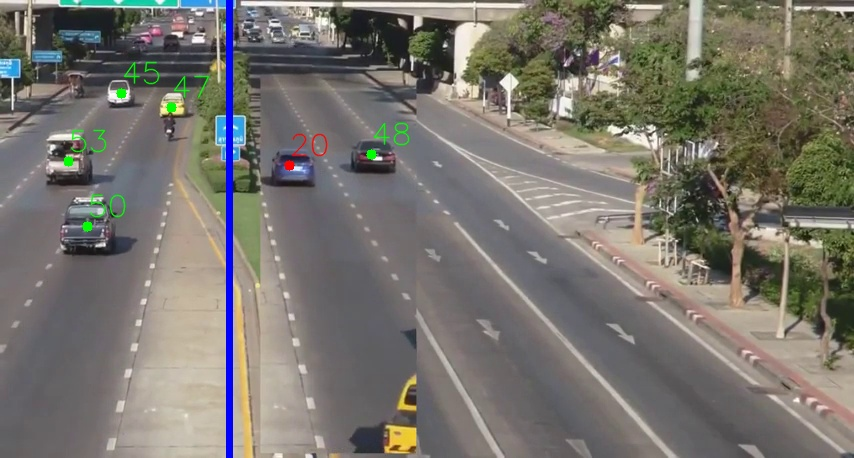

Number 48 above is green since the program takes time to penalise a WSD vehicle to avoid false positives when a vehicle is parked or stuck in traffic.